In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdp
import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0
%matplotlib inline
import imp
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('data/LC_Compiled.csv',low_memory=False)

In [3]:
print('{} Loans and {} Features'.format(df.shape[0],df.shape[1]))

2507519 Loans and 151 Features


In [17]:
import src.LC_Clean_Assist as LCC
import src.LC_Plotter as LCP
imp.reload(LCC)
imp.reload(LCP)

<module 'src.LC_Plotter' from '/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Plotter.py'>

In [5]:
df = LCC.clean_lc_for_plotting(df)

In [6]:
ls_df = df.groupby('loan_status').sum().reset_index()[['loan_status','loan_amnt']]
ls_df['loan_amnt'] = round(ls_df['loan_amnt'] / 1000000,1)
ls_df

,loan_status,loan_amnt
0,Charged Off,4844.6
1,Current,14731.0
2,Default,0.8
3,Fully Paid,17896.6
4,In Grace Period,171.4
5,Late (16-30 days),73.1
6,Late (31-120 days),401.4


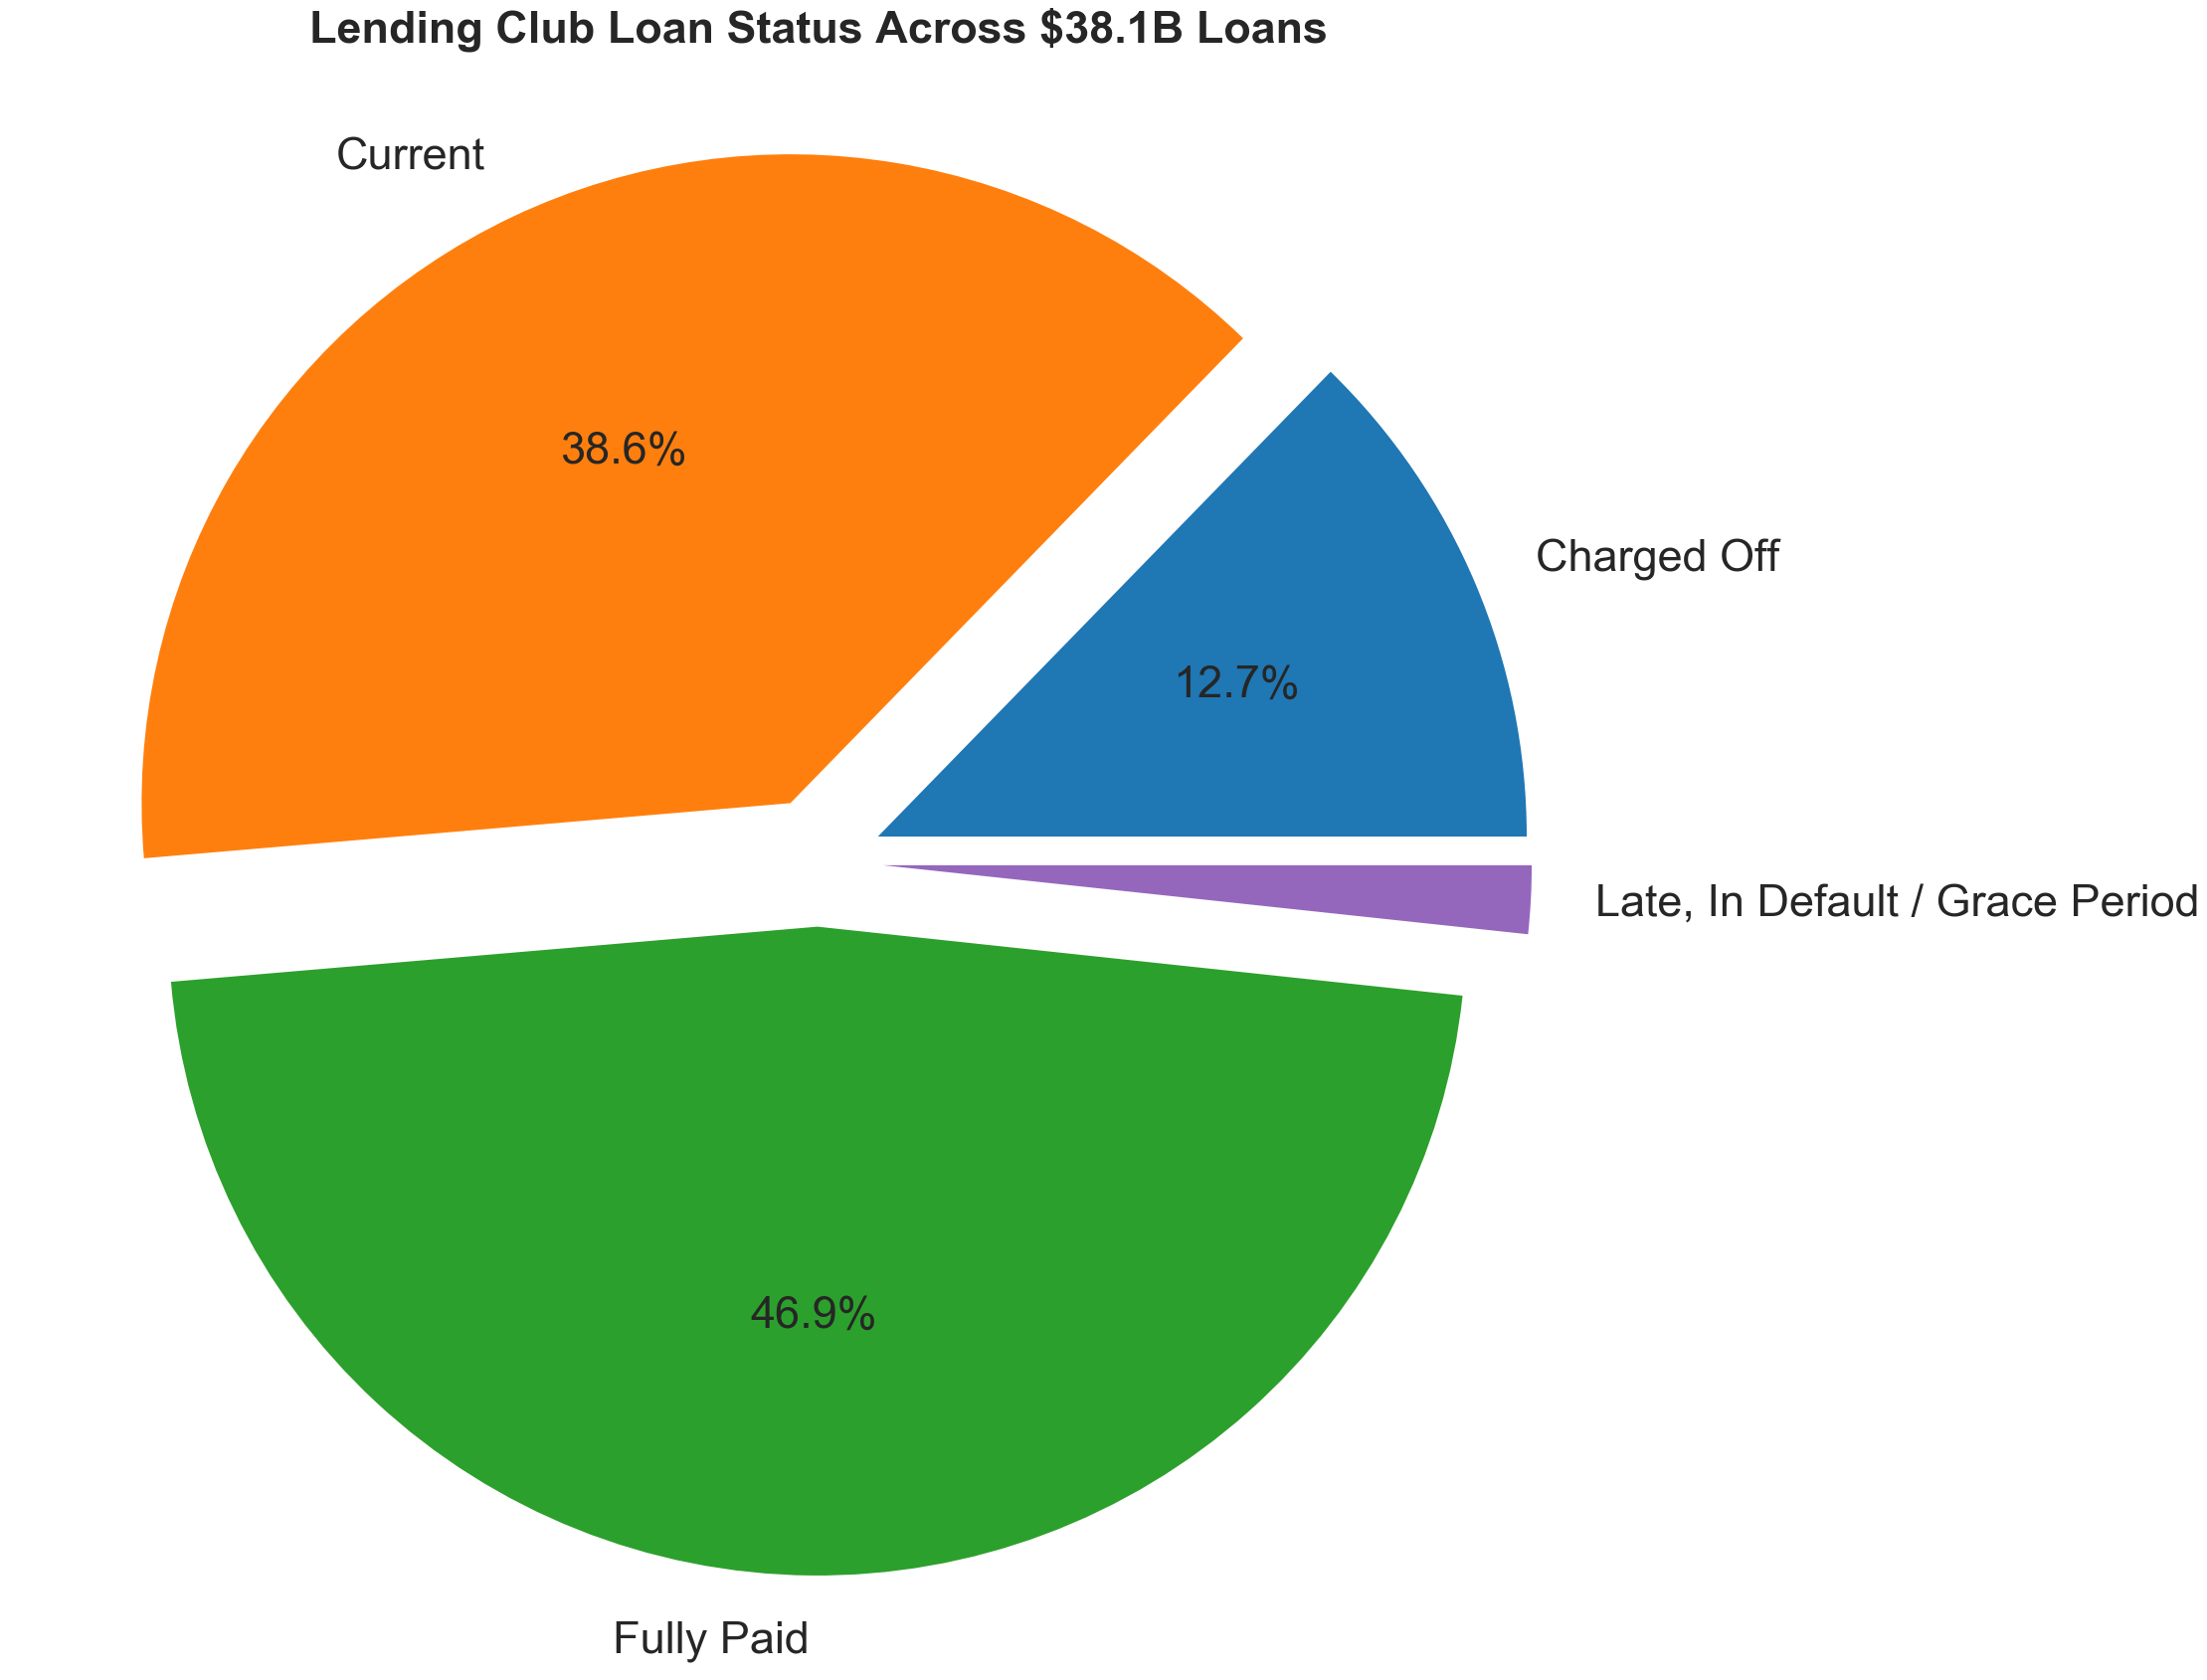

In [7]:
LCP.plot_loan_breakdown_pie(df)

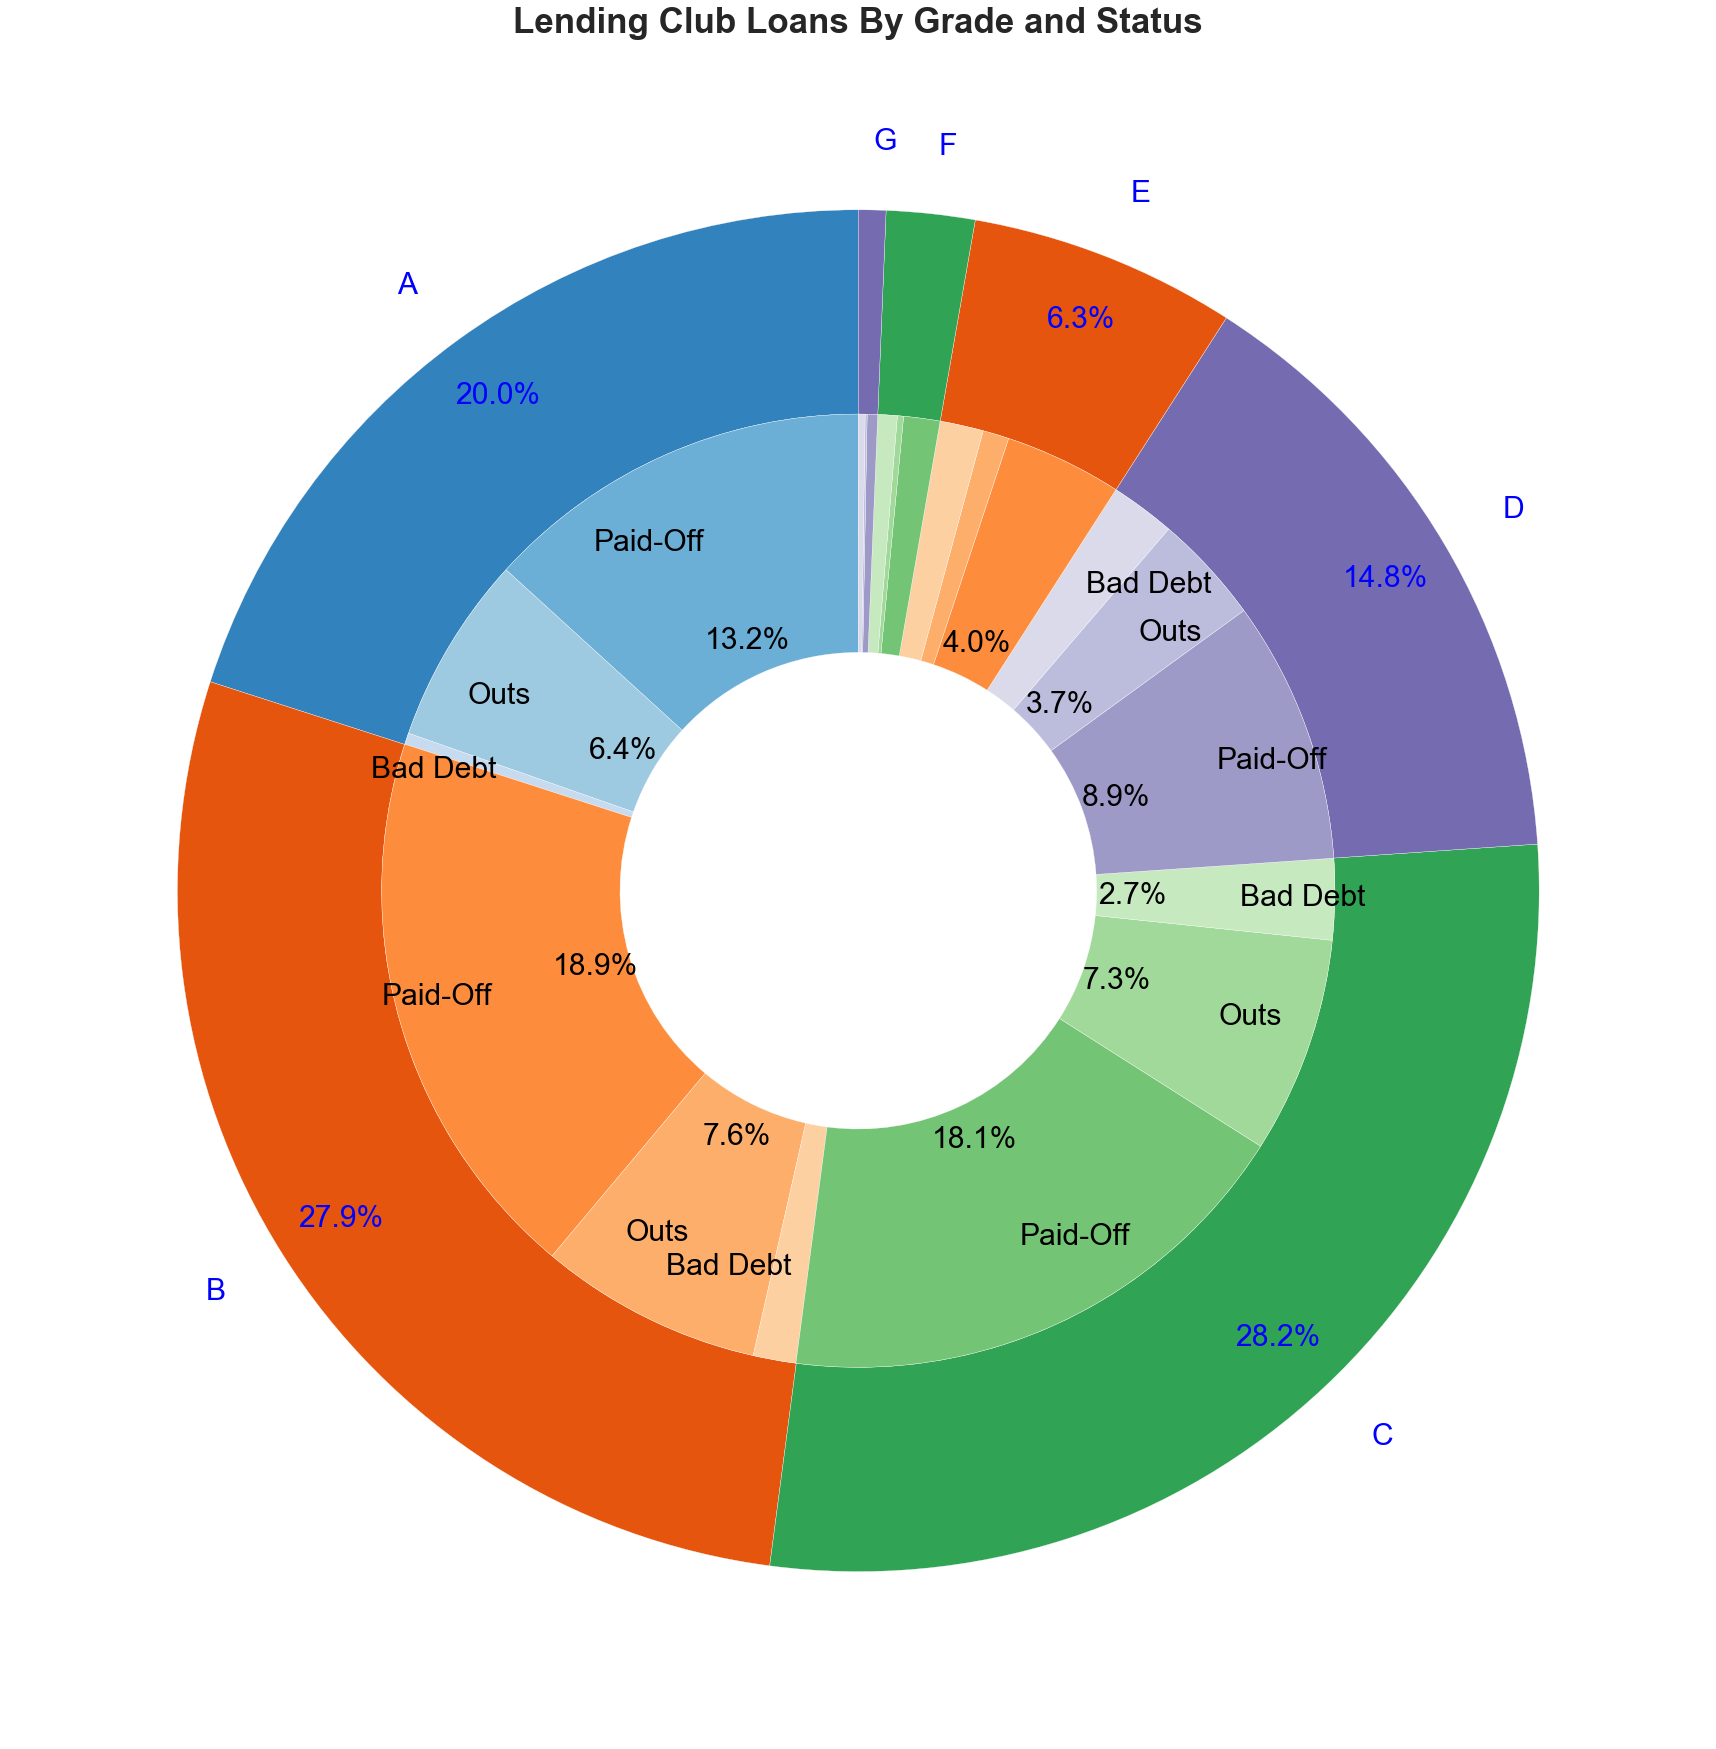

In [8]:
LCP.plot_grade_breakdown_pie(df)

In [9]:
grade_pie = df.groupby('grade').sum()[['loan_amnt','total_rec_prncp','out_prncp','delinq_amnt','charged_off_amnt']]
grade_pie.reset_index(inplace=True)
grade_pie['bad_debt'] = grade_pie['delinq_amnt'] + grade_pie['charged_off_amnt']
grade_pie[['total_rec_prncp','out_prncp','bad_debt']] = grade_pie[['total_rec_prncp','out_prncp','bad_debt']] /1000000
grade_pie[['grade','total_rec_prncp','out_prncp','bad_debt']]

,grade,total_rec_prncp,out_prncp,bad_debt
0,A,5050.315265,2440.360574,146.596667
1,B,7196.688636,2884.754836,553.493700
2,C,6896.626817,2801.358284,1047.836853
3,D,3399.658588,1415.771755,838.500023
4,E,1517.951181,338.560155,561.495501
5,F,469.852839,79.367261,250.597793
6,G,135.273837,25.808561,87.075807


In [10]:
LCP.choro_debt_state(df)

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `./images/state_choro_loan_total.png` didn't end with .html. Adding .html to the end of your file.



In [11]:
LCP.choro_debt_state_count(df)

/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `./images/state_choro_loan_count_total.png` didn't end with .html. Adding .html to the end of your file.



In [12]:
df.groupby('addr_state').mean().reset_index()[['addr_state','loan_amnt']].sort_values(by='loan_amnt',ascending=False).head(3)

,addr_state,loan_amnt
0,AK,17432.998441
45,VA,16288.906571
11,HI,16044.383392


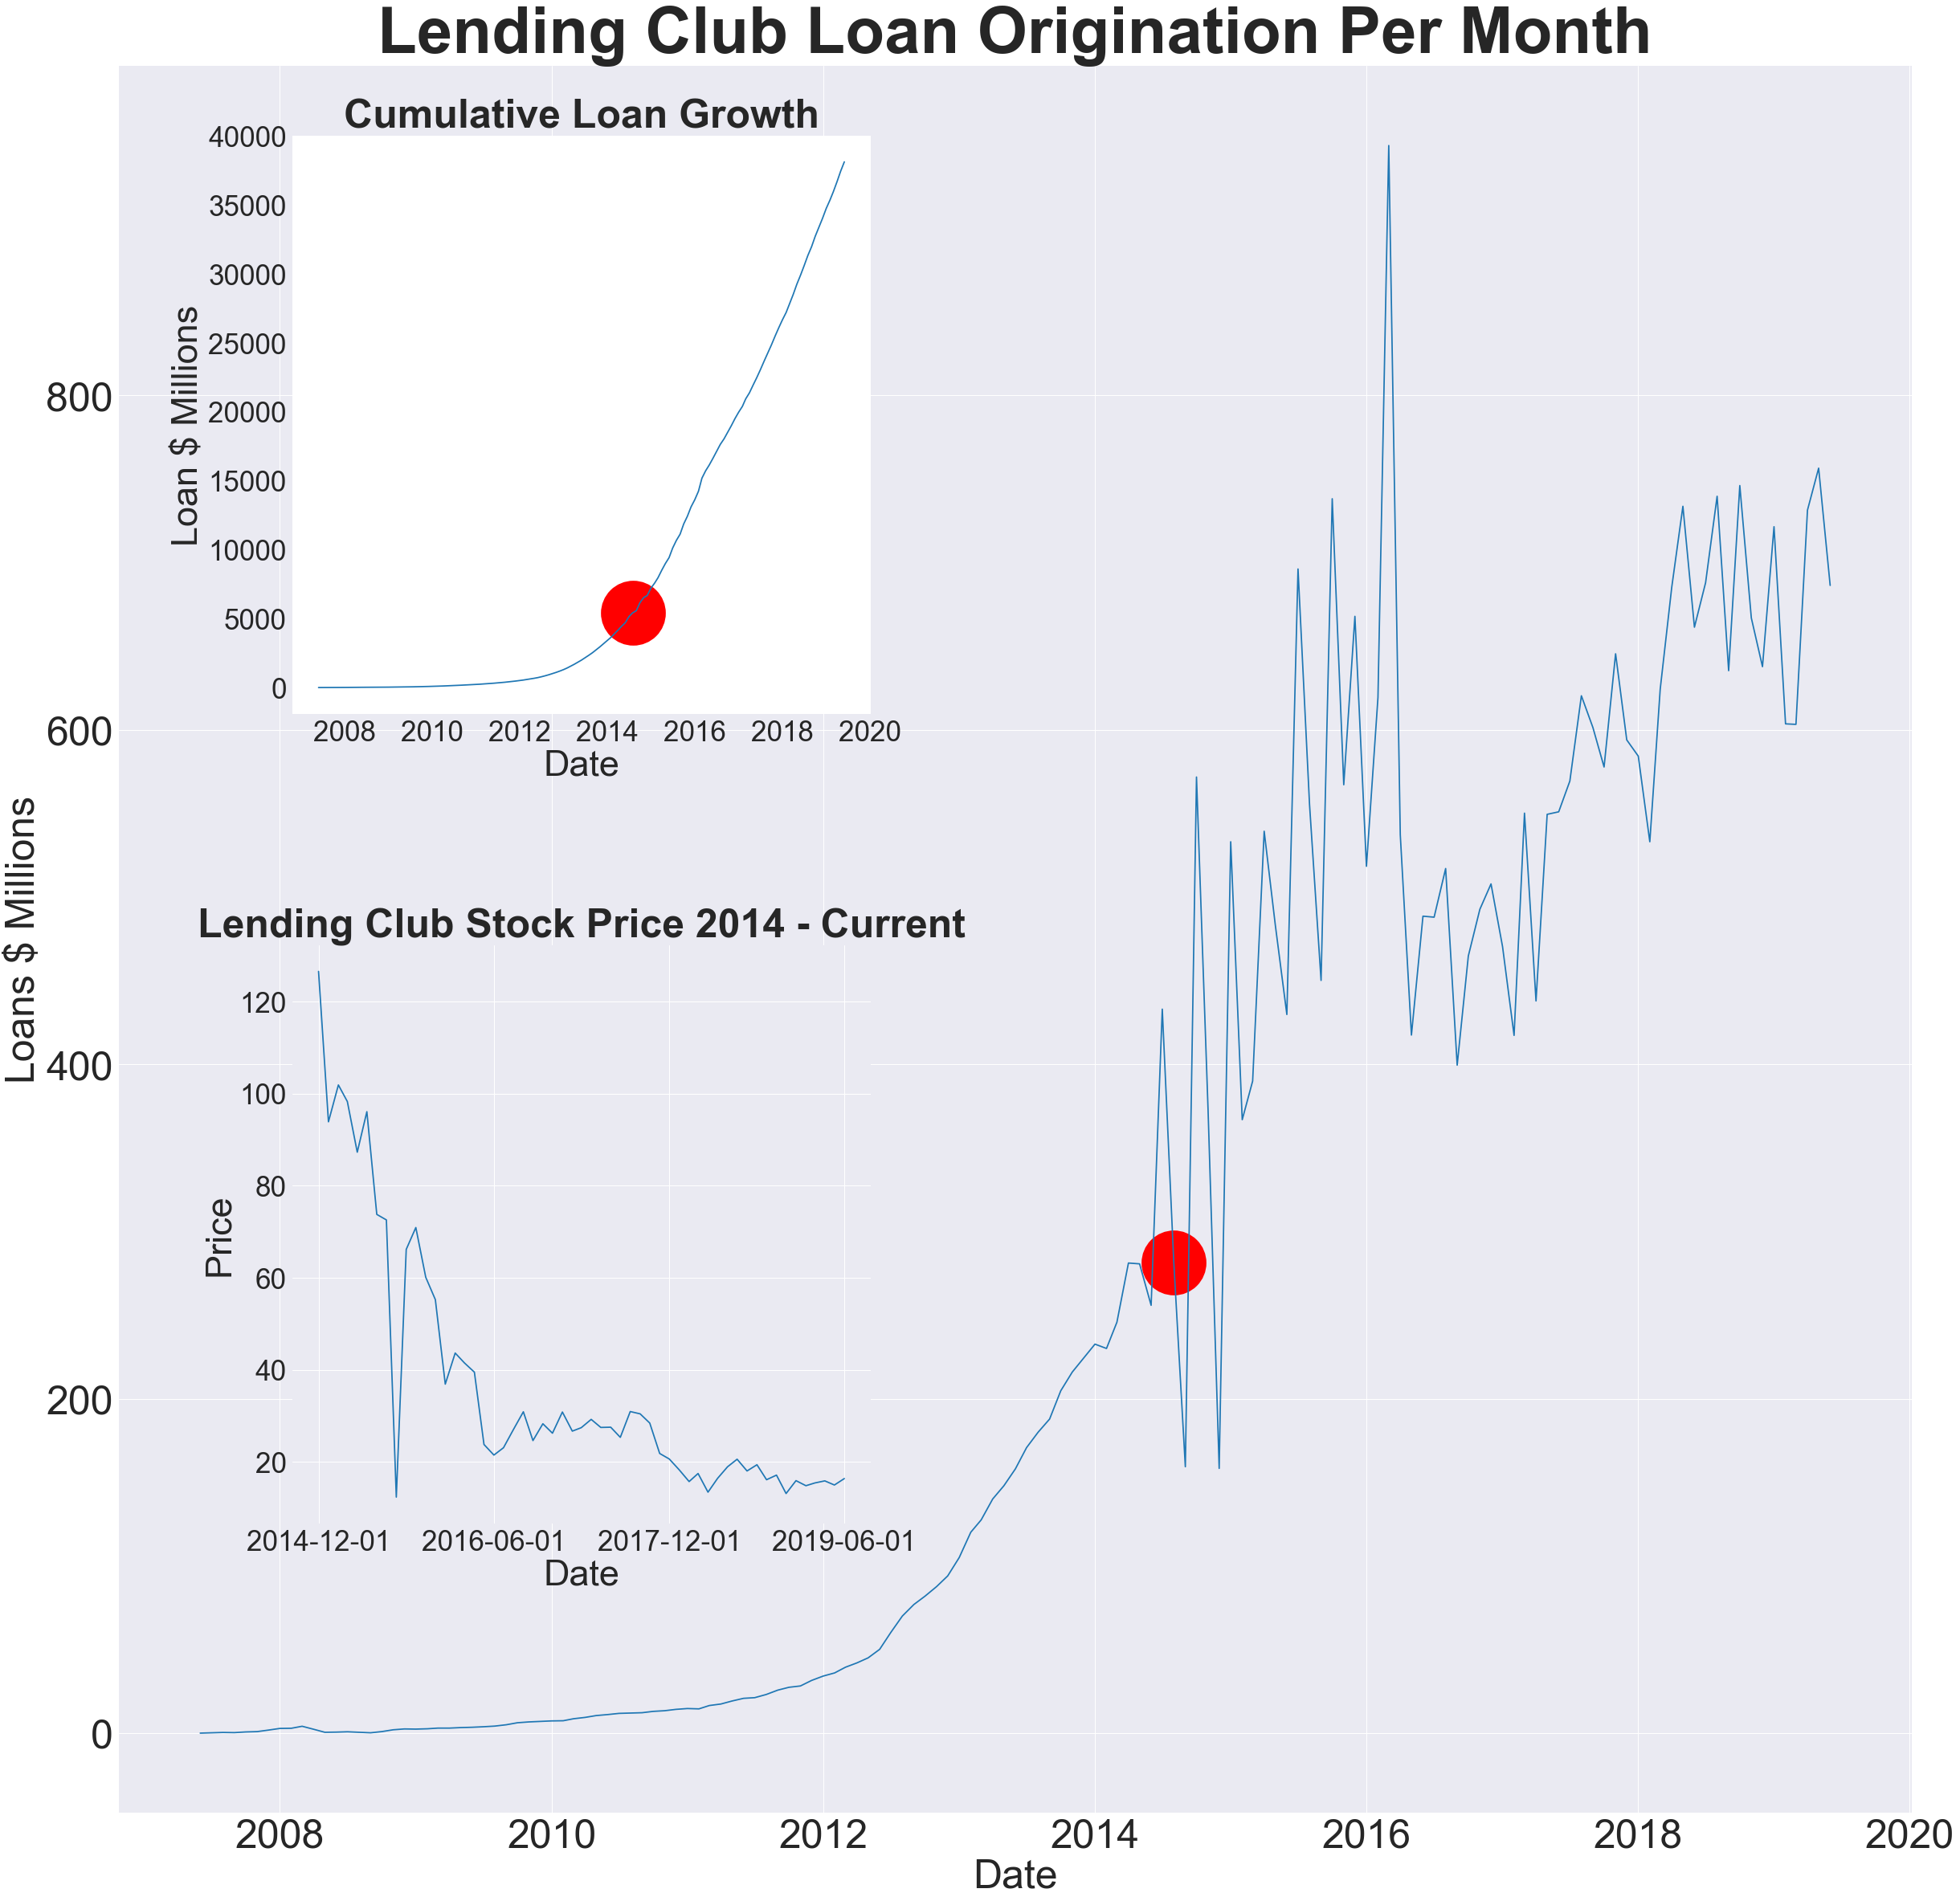

In [13]:
LCP.lc_time_series(df)

In [14]:
ts_group = df.groupby('issue_d').sum()
ts_group.reset_index(inplace=True)
max_idx = np.argmax(ts_group['loan_amnt'])
ts_group[ts_group.index == max_idx][['issue_d','loan_amnt']]

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning:


The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.



,issue_d,loan_amnt
105,2016-03-01,949367550.0


In [15]:
ts_group['year'] = ts_group['issue_d'].apply(lambda x: str(x).split('-')[0])
ts_group.groupby('year').sum()['loan_amnt'] / 1000000000

year
2007    0.004977
2008    0.021119
2009    0.051928
2010    0.131993
2011    0.261684
2012    0.718411
2013    1.982765
2014    3.503840
2015    6.417608
2016    6.400570
2017    6.584957
2018    7.936263
2019    4.102728
Name: loan_amnt, dtype: float64

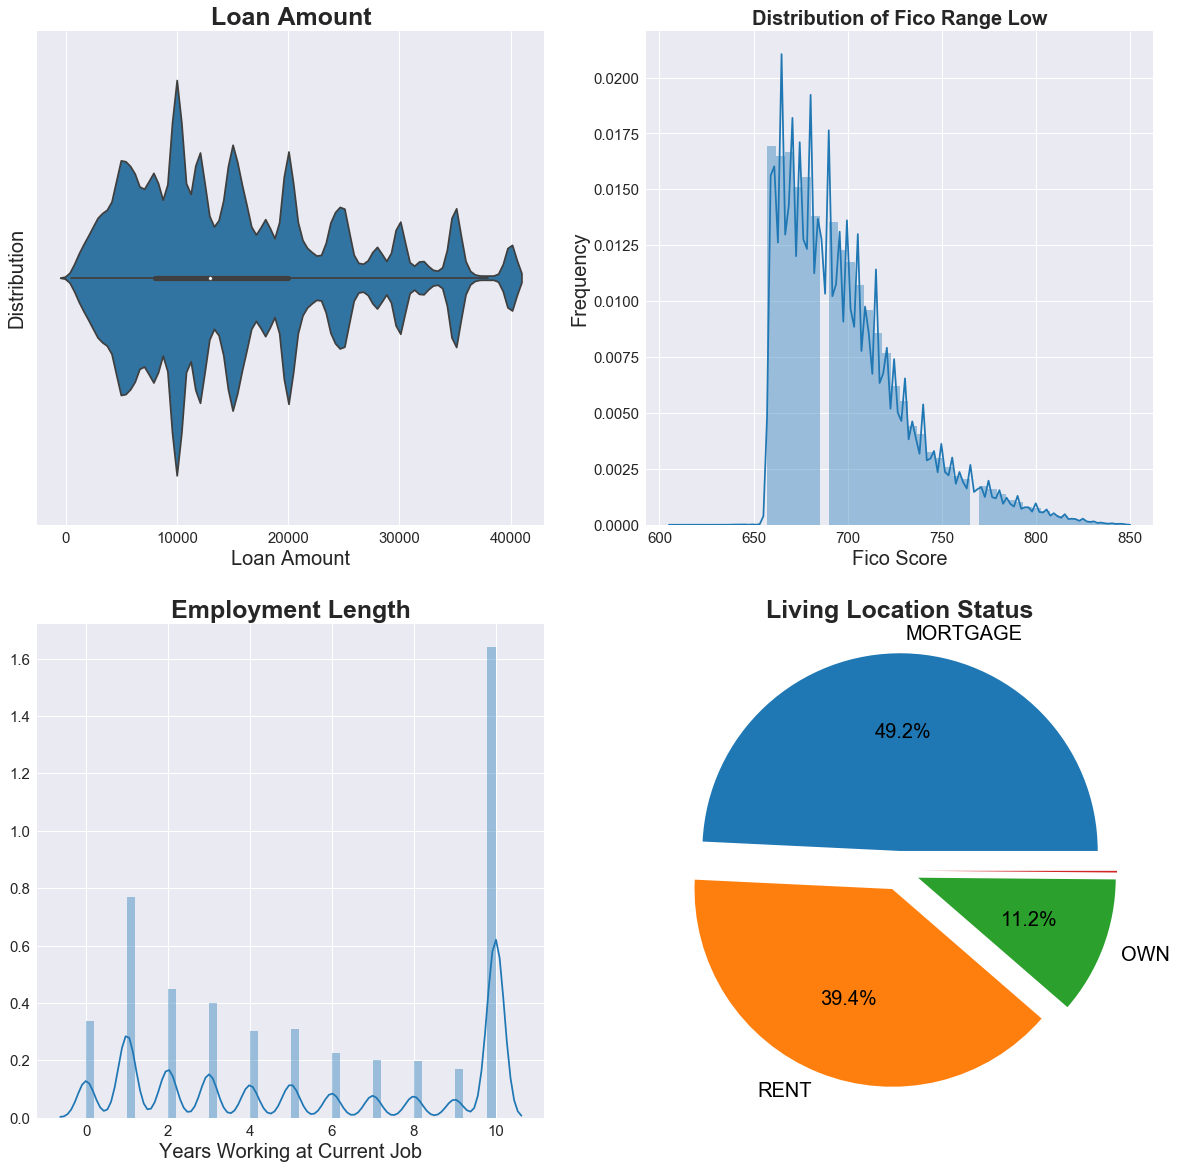

In [16]:
LCP.lc_individual_profile(df)

In [21]:
df = LCC.clean_lc_for_models(df)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Clean_Assist.py:62: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/adamricks/Documents/Galvanize/Capstone2/lending-club/src/LC_Clean_Assist.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

In [22]:
returns = LCP.lc_returns(df)

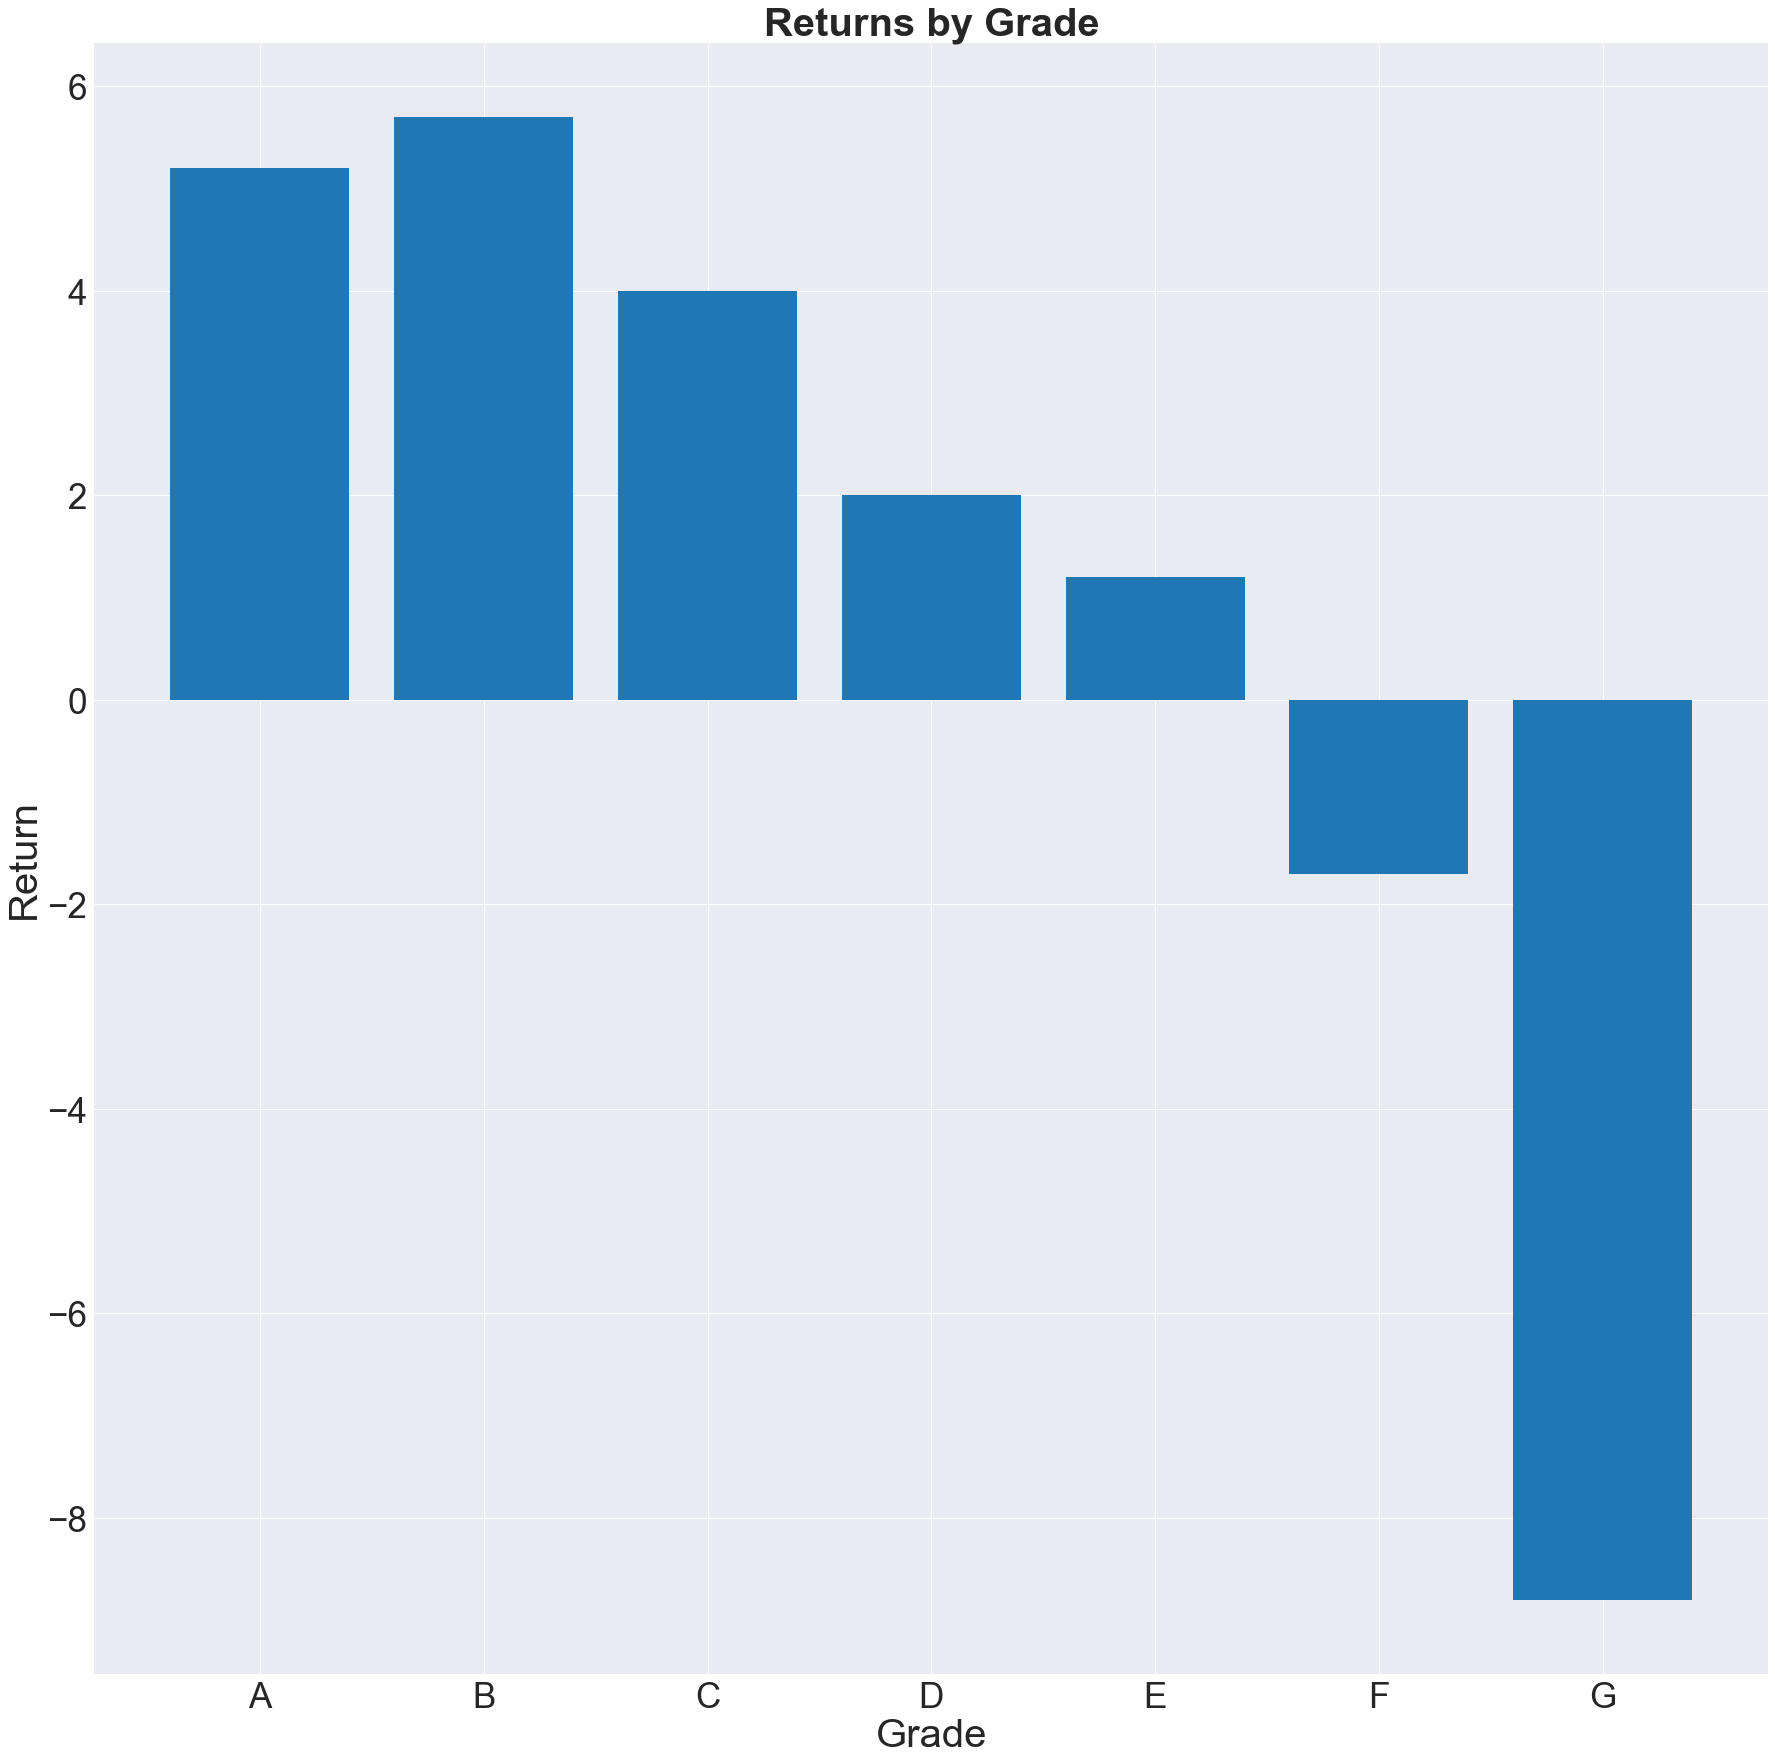

In [23]:
LCP.lc_plot_returns(returns)

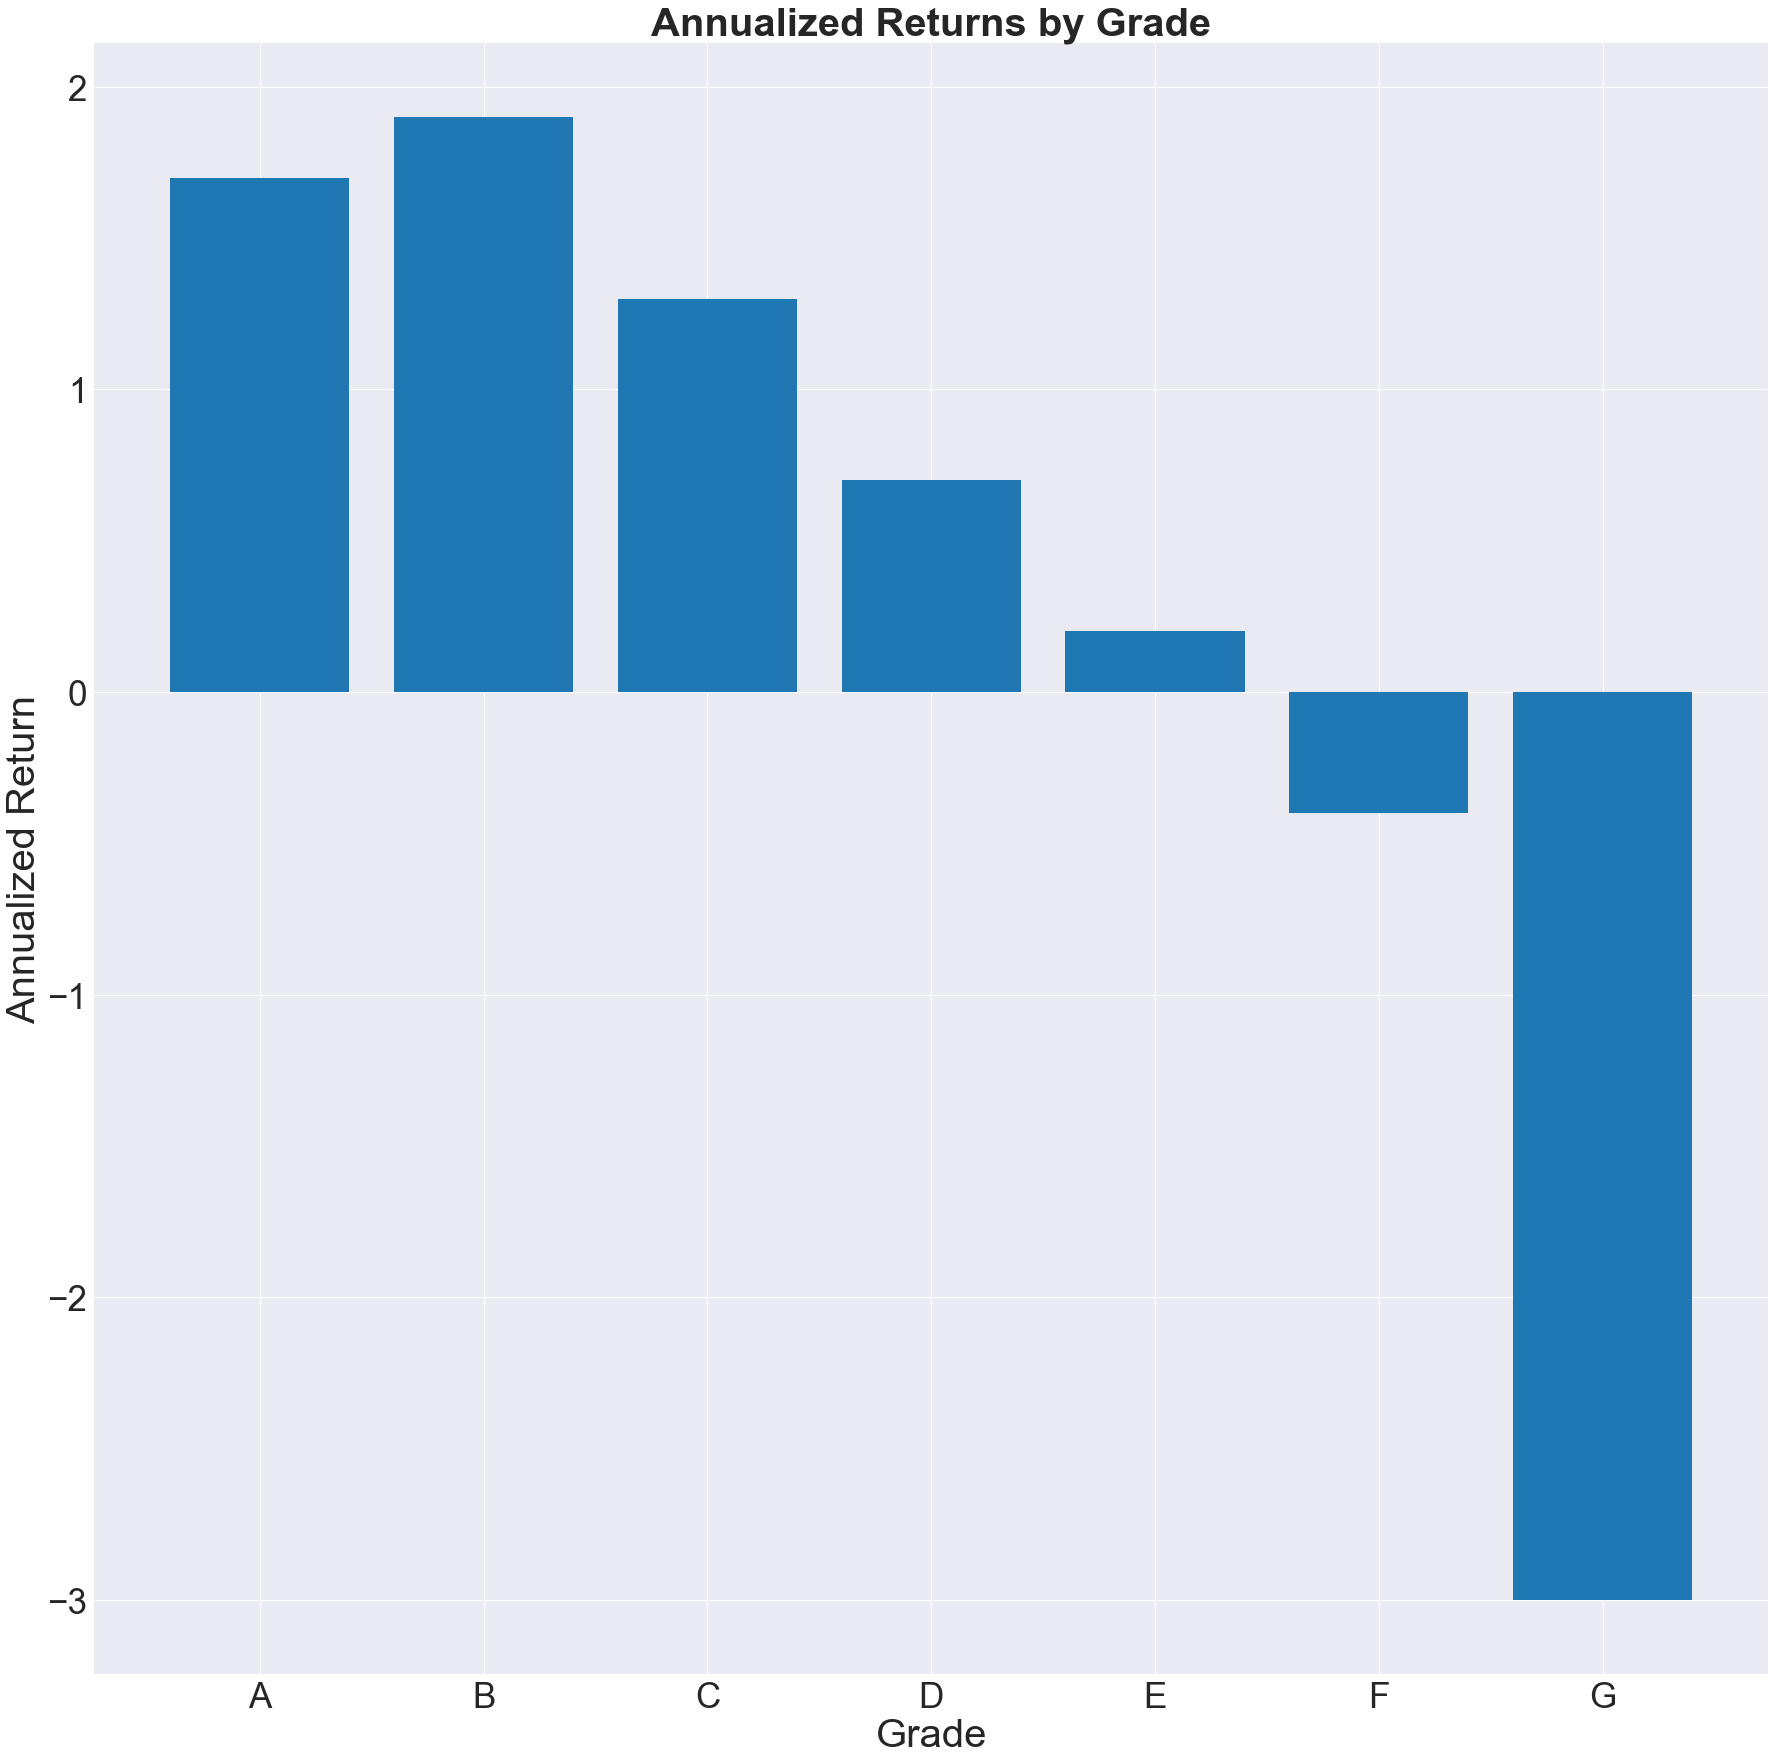

In [24]:
LCP.lc_plot_annualized_returns(returns)